In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Column Description

PassengerId: Unique identifier for each passenger.

Survived: Survival status (0 = No, 1 = Yes).

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Reflects socio-economic status.

Name:Full name of the passenger (may include titles like Mr., Mrs., Miss, etc.).

Sex: Gender of the passenger.

Age: Age of the passenger in years. May contain missing values.

SibSp: Number of siblings or spouses aboard the Titanic.

Parch: Number of parents or children aboard the Titanic.

Ticket: Ticket number. May have duplicates.

Fare: Fare paid for the ticket.

Cabin: Cabin number. Many entries are missing (NaN).

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Certain columns has spelling mistake want to correct the mistake 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
# Filling the Age column with median
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,PassengerId,Title,Sex,Age,FamilySize,Pclass,Fare,Embarked,TicketPrefix,Survived
0,1,Mr,male,22,2,3,7.2500,S,A/,0
1,2,Mrs,female,38,2,1,71.2833,C,PC,1
2,3,Miss,female,26,1,3,7.9250,S,STON/O,1
3,4,Mrs,female,35,2,1,53.1000,S,None,1
4,5,Mr,male,35,1,3,8.0500,S,None,0


In [21]:
df['Age'] = df['Age'].astype(int)
df.head()

,PassengerId,Title,Sex,Age,FamilySize,Pclass,Fare,Embarked,TicketPrefix,Survived
0,1,Mr,male,22,2,3,7.2500,S,A/,0
1,2,Mrs,female,38,2,1,71.2833,C,PC,1
2,3,Miss,female,26,1,3,7.9250,S,STON/O,1
3,4,Mrs,female,35,2,1,53.1000,S,None,1
4,5,Mr,male,35,1,3,8.0500,S,None,0


In [22]:
#Filling the missing values in Embarked with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,PassengerId,Title,Sex,Age,FamilySize,Pclass,Fare,Embarked,TicketPrefix,Survived
0,1,Mr,male,22,2,3,7.2500,S,A/,0
1,2,Mrs,female,38,2,1,71.2833,C,PC,1
2,3,Miss,female,26,1,3,7.9250,S,STON/O,1
3,4,Mrs,female,35,2,1,53.1000,S,None,1
4,5,Mr,male,35,1,3,8.0500,S,None,0


In [10]:
# Drop Cabin because it has nearly 75% of data missing
df.drop(['Cabin'], axis=1, inplace=True)

In [11]:
# extract title because name has high cardinality
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [12]:
# Same for this also ticket column as high cardinality
df['TicketPrefix'] = df['Ticket'].str.extract('([A-Za-z./]+)', expand=False)
df['TicketPrefix'] = df['TicketPrefix'].fillna('None')

In [13]:
# Adding new feature Familysize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [14]:
df.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket'], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,TicketPrefix,FamilySize
0,1,0,3,male,22,7.2500,S,Mr,A/,2
1,2,1,1,female,38,71.2833,C,Mrs,PC,2
2,3,1,3,female,26,7.9250,S,Miss,STON/O,1
3,4,1,1,female,35,53.1000,S,Mrs,None,2
4,5,0,3,male,35,8.0500,S,Mr,None,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,13.0000,S,Rev,None,1
887,888,1,1,female,19,30.0000,S,Miss,None,1
888,889,0,3,female,28,23.4500,S,Miss,W./C.,4
889,890,1,1,male,26,30.0000,C,Mr,None,1


In [15]:
df = df[['PassengerId', 'Title', 'Sex', 'Age', 'FamilySize',
         'Pclass', 'Fare', 'Embarked', 'TicketPrefix', 'Survived']]
df

,PassengerId,Title,Sex,Age,FamilySize,Pclass,Fare,Embarked,TicketPrefix,Survived
0,1,Mr,male,22,2,3,7.2500,S,A/,0
1,2,Mrs,female,38,2,1,71.2833,C,PC,1
2,3,Miss,female,26,1,3,7.9250,S,STON/O,1
3,4,Mrs,female,35,2,1,53.1000,S,None,1
4,5,Mr,male,35,1,3,8.0500,S,None,0
...,...,...,...,...,...,...,...,...,...,...
886,887,Rev,male,27,1,2,13.0000,S,None,0
887,888,Miss,female,19,1,1,30.0000,S,None,1
888,889,Miss,female,28,4,3,23.4500,S,W./C.,0
889,890,Mr,male,26,1,1,30.0000,C,None,1


In [17]:
pip install matplotlib

  Using cached matplotlib-3.10.5-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp311-cp311-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


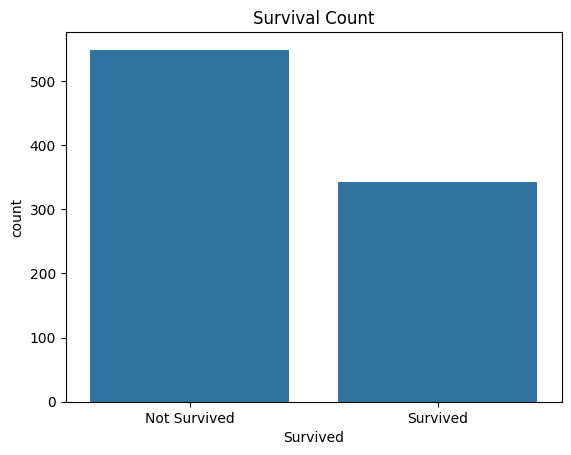

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

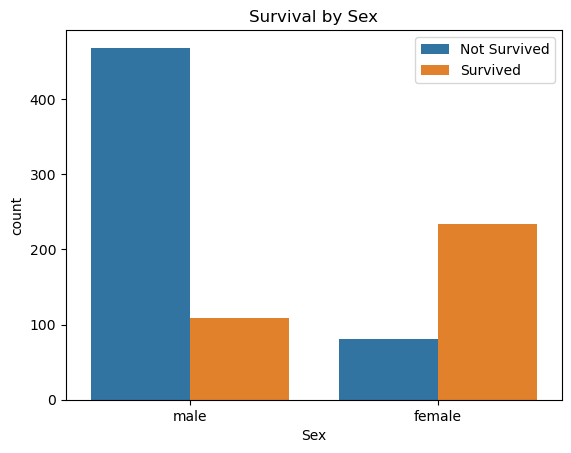

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

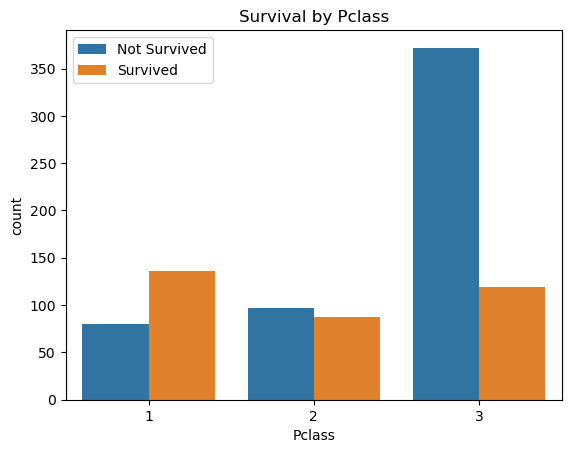

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

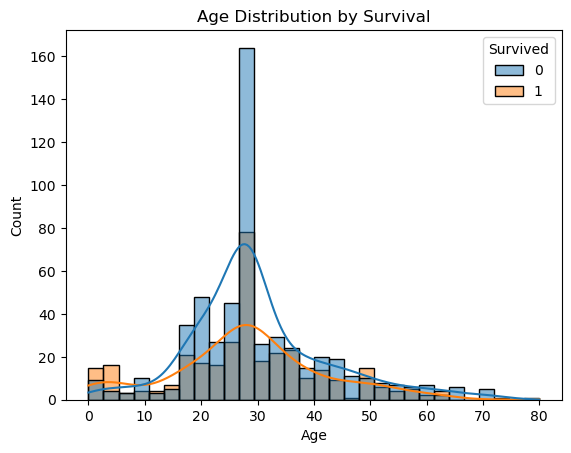

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

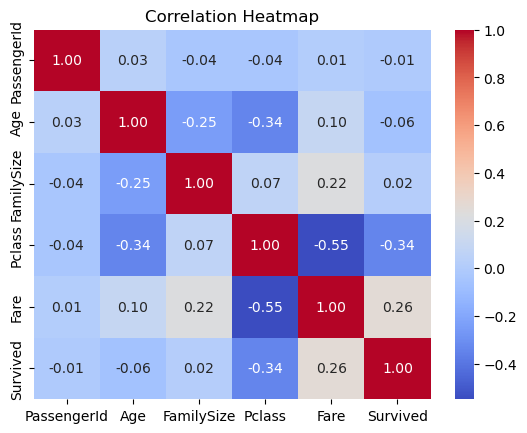

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()